**"Financial Analytics Using Python"**

Objective:

To provide a comprehensive competitive analysis of the top 500 companies in India based on their market capitalization and quarterly sales, with the goal of identifying key market dynamics and actionable insights for improving business performance.

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Loading and Understanding the Dataset**

In [ ]:
Datapath = '/content/Financial Analytics data.csv'

In [ ]:
data = pd.read_csv(Datapath)
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [ ]:
data.shape

(488, 5)

In [ ]:
data.index

RangeIndex(start=0, stop=488, step=1)

In [ ]:
data.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


**Data Cleaning**

In [ ]:
# Fill the empty spaces in 'Sales Qtr - Crore' with values from the unnamed column
data['Sales Qtr - Crore'] = data['Sales Qtr - Crore'].fillna(data.iloc[:, 4])

# Drop the unnamed column
data = data.drop(data.columns[4], axis=1)

In [ ]:
# Create a mask for rows with null values in BOTH 'Market Capital - Crore' AND 'Sales Qtr - Crore'
mask = data[['Mar Cap - Crore', 'Sales Qtr - Crore']].isnull().all(axis=1)

# Set 'Company Name' and 'S.No.' to null for those rows
data.loc[mask, ['Name', 'S.No.']] = None


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              479 non-null    float64
 1   Name               479 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  459 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.4+ KB


In [ ]:
Data = data.dropna(subset=['S.No.', 'Name', 'Mar Cap - Crore'])

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 0 to 486
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              479 non-null    float64
 1   Name               479 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  459 non-null    float64
dtypes: float64(3), object(1)
memory usage: 18.7+ KB


In [ ]:
# Calculate skewness of 'Sales Qtr - Crore' column
sales_skewness = Data['Sales Qtr - Crore'].skew()

print(sales_skewness)

6.833822665838169


In [ ]:
Data['Sales Qtr - Crore'] = Data['Sales Qtr - Crore'].fillna(Data['Sales Qtr - Crore'].median())

<ipython-input-22-6ba694e45ec9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Sales Qtr - Crore'] = Data['Sales Qtr - Crore'].fillna(Data['Sales Qtr - Crore'].median())


In [ ]:
Data.isnull().sum()

S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [ ]:
# Drop the 'S.No.' column
Data = Data.drop('S.No.', axis=1)

# Rename the columns
Data = Data.rename(columns={'Mar Cap - Crore': 'Market Capital', 'Sales Qtr - Crore': 'Quarter Sales'})

# Display the modified DataFrame (optional)
Data.head()

,Name,Market Capital,Quarter Sales
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,H D F C,289497.37,16840.51


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 0 to 486
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            479 non-null    object 
 1   Market Capital  479 non-null    float64
 2   Quarter Sales   479 non-null    float64
dtypes: float64(2), object(1)
memory usage: 15.0+ KB


**Data Analysis and Visualization**

In [ ]:
Data.describe()

,Market Capital,Quarter Sales
count,479.000000,479.000000
mean,28043.857119,3696.281294
std,59464.615831,9792.843974
min,3017.070000,0.000000
25%,4843.575000,559.725000
50%,9885.050000,1137.170000
75%,23549.900000,2630.235000
max,583436.720000,110666.930000


<ipython-input-27-1b3691a53b5c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Market Capital'])


<Axes: xlabel='Market Capital', ylabel='Density'>

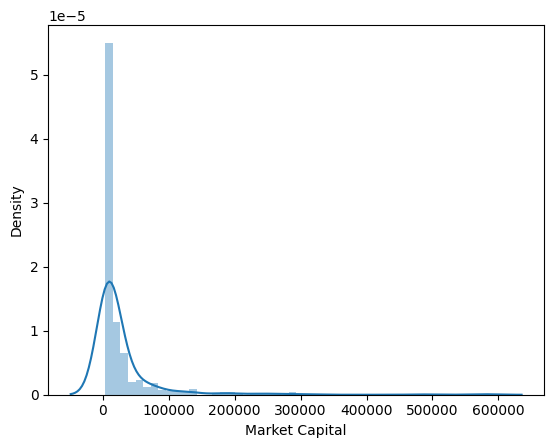

In [ ]:
sns.distplot(Data['Market Capital'])

<ipython-input-28-392fa9aa732c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Quarter Sales'])


<Axes: xlabel='Quarter Sales', ylabel='Density'>

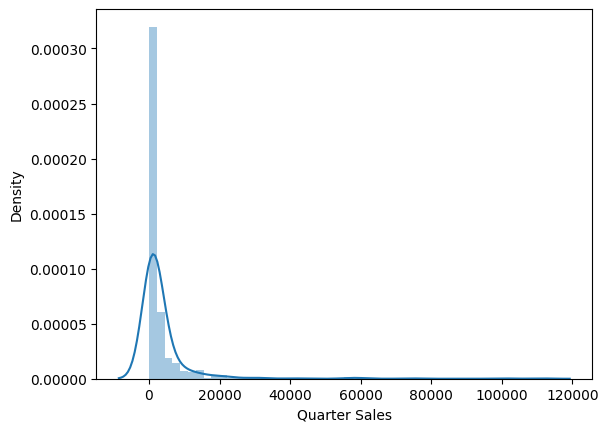

In [ ]:
sns.distplot(Data['Quarter Sales'])

**Top and Bottom 5 Companies based on Market Capitalization**

In [ ]:
Data.nlargest(5, 'Market Capital')

,Name,Market Capital,Quarter Sales
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,H D F C,289497.37,16840.51


In [ ]:
Data.nsmallest(5, 'Market Capital')

,Name,Market Capital,Quarter Sales
486,Natl.Fertilizer,3017.07,2840.75
485,Orient Cement,3024.32,511.53
484,NOCIL,3026.26,249.27
483,Lak. Vilas Bank,3029.57,790.17
482,Prime Focus,3031.50,609.61


**Top and Bottom 5 Companies based on Quarter Sales**

In [ ]:
Data.nlargest(5, 'Quarter Sales')

,Name,Market Capital,Quarter Sales
14,I O C L,178017.48,110666.93
0,Reliance Inds.,583436.72,99810.00
23,Tata Motors,117071.87,74156.07
27,B P C L,98278.00,60616.36
54,H P C L,58034.78,57474.25


In [ ]:
Data.nsmallest(5, 'Quarter Sales')

,Name,Market Capital,Quarter Sales
393,Ujjivan Fin.Ser.,4293.42,0.00
228,SPARC,10755.13,19.42
382,Tata Inv.Corpn.,4401.66,47.02
467,Central Dep. Ser,3316.31,47.24
422,Multi Comm. Exc.,3847.19,60.97


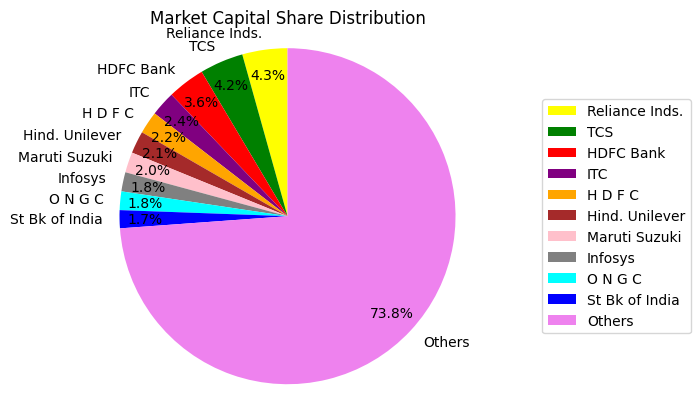

In [ ]:
# Calculate total market capitalization
total_market_cap = Data['Market Capital'].sum()

# Get the top 10 companies by market capitalization
top_10_market_cap = Data.nlargest(10, 'Market Capital')

# Calculate market share for top 10 companies
top_10_market_cap_shares = top_10_market_cap['Market Capital'] / total_market_cap

# Calculate the market share of other companies
other_market_cap_share = 1 - top_10_market_cap_shares.sum()

# Combine the market shares
sizes = top_10_market_cap_shares.tolist() + [other_market_cap_share]

# Create a list of colors, highlighting each company
colors = ['yellow', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'blue', 'violet']

# Create the pie chart
labels = top_10_market_cap['Name'].tolist() + ['Others']
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.85,  # Adjusts the position of the percentage labels
    labeldistance=1.1  # Adjusts the position of the labels
)
plt.title('Market Capital Share Distribution')
plt.axis('equal')

# Add a legend on the side
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5))

# Display the chart
plt.show()

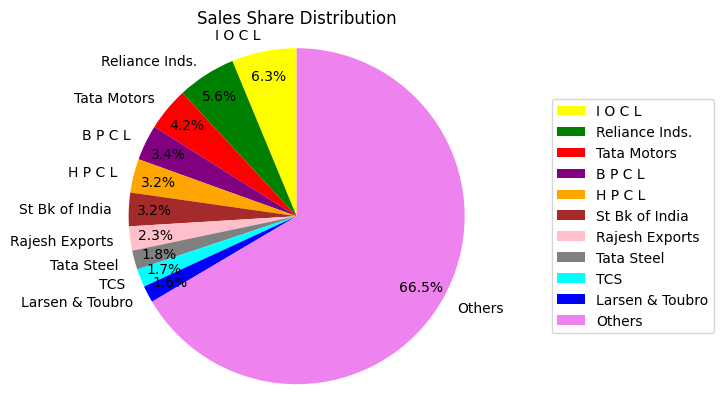

In [ ]:
# Calculate total sales
total_sales = Data['Quarter Sales'].sum()

# Get the top 10 companies by quarter sales
top_10_sales = Data.nlargest(10, 'Quarter Sales')

# Calculate sales share for top 10 companies
top_10_sales_shares = top_10_sales['Quarter Sales'] / total_sales

# Calculate the sales share of other companies
other_sales_share = 1 - top_10_sales_shares.sum()

# Combine the sales shares
sizes = top_10_sales_shares.tolist() + [other_sales_share]

# Create a list of colors, highlighting each company
colors = ['yellow', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'blue', 'violet']

# Create the pie chart
labels = top_10_sales['Name'].tolist() + ['Others']
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.85,  # Adjusts the position of the percentage labels
    labeldistance=1.1  # Adjusts the position of the labels
)
plt.title('Sales Share Distribution')
plt.axis('equal')

# Add a legend on the side
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5))

# Display the chart
plt.show()

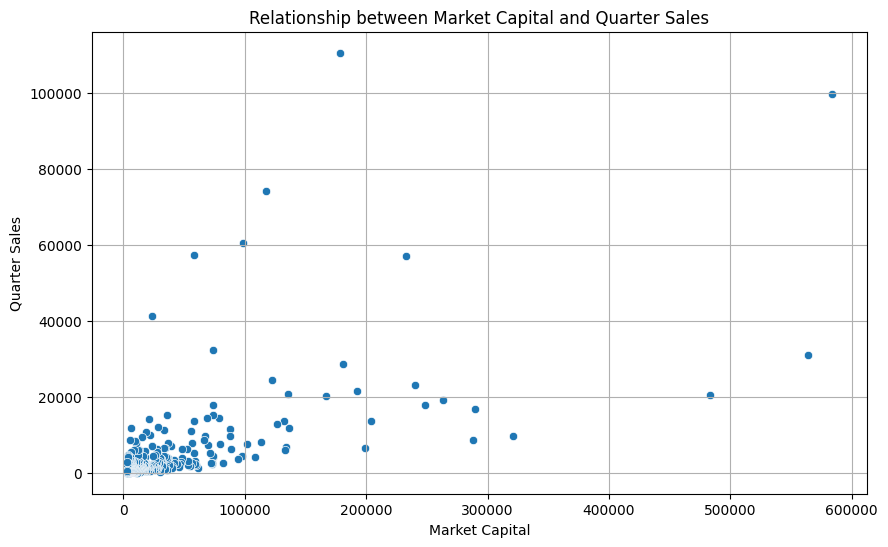

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x='Market Capital', y='Quarter Sales', data=Data)
plt.title('Relationship between Market Capital and Quarter Sales')
plt.xlabel('Market Capital')
plt.ylabel('Quarter Sales')
plt.grid(True)  # Add a grid for better visualization
plt.show()

In [ ]:
correlation = Data['Market Capital'].corr(Data['Quarter Sales'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.6251492909307498


**Conclusion**

The analysis of India's top 500 companies reveals a significant concentration of market power within the top 10 firms, both in terms of market capitalization and quarterly sales. These leading companies dominate the market, accounting for a substantial share of the total market value and sales revenue, while the bottom companies hold minimal shares. The positive correlation coefficient of 0.6 between market capitalization and quarterly sales suggests that companies with higher market value generally experience higher sales, though other factors also contribute to these metrics.

Given these insights, market leaders should leverage their dominant position to drive further innovation and expansion, while smaller companies should focus on niche markets and unique value propositions to differentiate themselves.